# Chapitre 1 : 
# Représenter & se repérer dans l’espace

## 1.1 Représenter

### 1.1.2 Lien entre la surface représentative d’une fonction de deux variables à valeurs réelles et ses lignes de niveaux

<img src="img/figure_1-3.png" alt="alt_text" align="left"/>

**Exercice** : Deviner quelle est la fonction de plusieurs variables représentée à la Figure 1.3.

Commençons par nous intéresser aux courbes de niveau.
Notons $c$ le point de coordonnées $(x_0, y_0, 0)$ qui représente le centre de la projection orthogonale de chacune des courbes de niveau sur le plan d'équation $z=0$.
Chaque projection est alors un cercle dont le rayon dépend de $k$. On notera ce rayon $r_k$ et l'équation de ce cercle $C_k$ devient alors
$$\forall (x,y) \in C_k, (x-x_0)^2+(y-y_0)^2 = r_k^2$$

_Remarque_ : Le maximal local de la figure est atteint à la valeur $k=50$.
Autrement dit, $C_{50} = \{(x_0, y_0, 50)\}$

On peut alors écrire $\forall k \in \mathbb{N}$*$
\forall (x,y) \in \mathbb{R}^2, \phantom{-} f(x,y)=k \phantom{-} \Longleftrightarrow \phantom{-} (x-x_0)^2 + (y-y_0)^2 = r_k ^2$\\ \\

On pose donc $r_k^2 = 50-k$. Alors, notre équation devient :
\begin{align*}
    &(x-x_0)^2 + (y-y_0)^2 = 50-f(x,y)\\
    &f(x,y) = - (x-x_0)^2 - (y-y_0)^2 + 50
\end{align*}

Cependant, comme il n'y a pas de graduations on ne peut pas vérifier notre solution.

On peut toutefois afficher la fonction avec python et matplotlib :

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

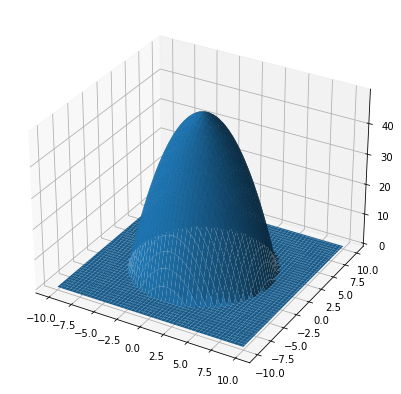

In [2]:
#définition de f
f = lambda x,y : -(x**2 + y**2) + 50

#variables d'espace
X = np.linspace(-10,10,100)
Y = X.copy()
XX,YY = np.meshgrid(X,Y)
ZZ = f(XX,YY)

ZZ[ZZ<0]=0 #on coupe les valeurs négatives

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(XX,YY,ZZ)

J'ai réussi à recréer la forme donnée dans l'énoncée grâce à la fonction gaussienne :

(0.0, 75.0)

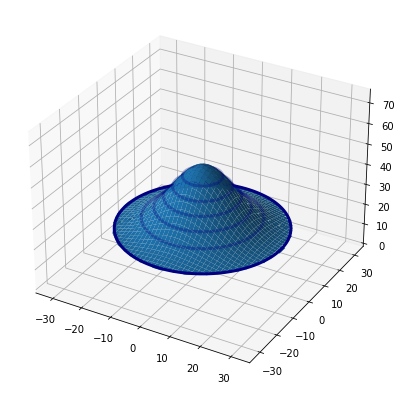

In [3]:
import warnings
warnings.filterwarnings('ignore')

#définission de la fonction gaussienne
s = 10
def gaussian(x, mu=0, sig=s):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#définission de la fonction
g = lambda x,y : 31*gaussian(x)*gaussian(y)+19

#création des variables d'espaces pour afficher le graphe
X = s*1.1*np.linspace(-np.pi,np.pi,100)
Y = X.copy()
XX,YY = np.meshgrid(X,Y)
ZZ = g(XX,YY)

ZZ[ZZ<19.82]=np.nan #on coupe les valeurs pour avoir un "chapeau" fini

#séparation des affichages en deux morceaux pour éviter d'avoir des points de l'arrière plan devant des points du premier plan
M1 = XX>2*YY #masque du derrière
M2 = XX<2*YY-3 #masque du devant

XX1,XX2 = XX.copy(), XX.copy()
YY1,YY2 = YY.copy(), YY.copy()
ZZ1,ZZ2 = ZZ.copy(), ZZ.copy()

for T in [XX1,YY1,ZZ1] :
    T[M1]=np.nan
for T in [XX2,YY2,ZZ2] :
    T[M2]=np.nan

#création de la figure en 3d
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

#ajout de l'arrière plan
ax.plot_surface(XX1,YY1,ZZ1, color='C00')
ax.contour(XX1,YY1, ZZ1, [25,30,35,40,45], colors=['navy'], alpha=0.3, linewidths=[3])
ax.contour(XX1,YY1, ZZ1, [20], colors=['navy'], linewidths=[3])

#ajout du premier plan
ax.plot_surface(XX2,YY2,ZZ2, color='C00')
ax.contour(XX2,YY2, ZZ2, [25,30,35,40,45], colors=['navy'], alpha=0.3, linewidths=[3])
ax.contour(XX2,YY2, ZZ2, [20], colors=['navy'], linewidths=[3])

#ajustement des limites pour avoir la même forme de chapeau
ax.set_xlim(X[0],X[-1])
ax.set_ylim(Y[0],Y[-1])
ax.set_zlim(0, 75)

***
__exercice__ : Tracer les courbes de niveau et la surface représentative de la fonction $F(x, y) = x^2 − y^2$.

$F(x,y) = x^2 - y^2$

__symétries :__
\begin{align*}
    F(-x,y) &= (-x)^2 - y^2 \\
    &= x^2 - y^2 \\
    &= F(x,y)
\end{align*}
Donc F est symétrique par rapport à l'axe des abscisses.

de même :
\begin{align*}
    F(x,-y) &= x^2 - (-y)^2 \\
    &= x^2 - y^2 \\
    &= F(x,y)
\end{align*}
Donc F est symétrique par rapport à l'axe des ordonnées.

__antisymétries :__
\begin{align*}
    F(x,y)=0 &\Longleftrightarrow x^2 - y^2 = 0 \\
    &\Longleftrightarrow x^2 = y^2 \\
    &\Longleftrightarrow |x| = |y| \\
    &\Longleftrightarrow x = y \text{ et } x = -y
\end{align*}
Donc $F(x,x) = 0$ et $F(x,-x)=0$

de plus :
\begin{align*}
    F(y,x)&=y^2-x^2 \\
    &=-(x^2 - y^2) \\
    &=-F(x,y)
\end{align*}

Donc F est antisymétrique par rapport aux graphes des fonctions $x=y$ et $x=-y$

__évolution de y par rapport à x :__

Soit $c \in \mathbb{R}$
\begin{align*}
    F(x,y) = c &\Longleftrightarrow x^2 - y^2 = c \\
    &\Longleftrightarrow -y^2 = c - x^2 \\
    &\Longleftrightarrow y^2 = x^2 - c \\
    &\Longleftrightarrow |y| = \sqrt{x^2 - c} \\
    &\Longleftrightarrow 
    \begin{cases}
        y = \sqrt{x^2 - c} \\
        y = -\sqrt{x^2 - c}
    \end{cases}
\end{align*}

Pour $c=1$ :

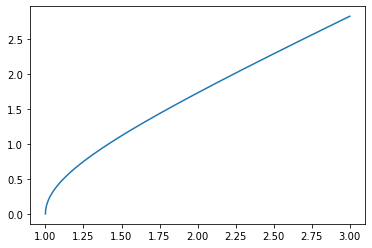

In [4]:
#tracé d'une partie des courbes de niveau
X = np.linspace(1,3,1001)
plt.plot(X, (X**2 - 1)**(0.5))

Donc dans la partie où $0 \le x \le y$, la courbe de niveau associée à la valeur 1 est la courbe ci-dessus.

Il suffit ensuite d'utiliser les symétries et antisymétries de la fonction pour tracer les courbes de niveau sur le graphes de $y$ selon $x$ :

(-3.0, 3.0)

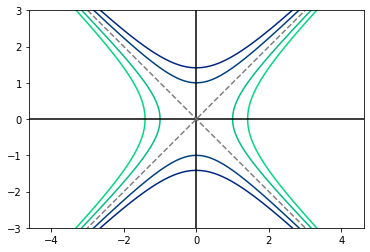

In [5]:
fig2,ax2 = plt.subplots()

#ajoute à la figure la ligne de niveau égale à k
def add(k):
    X = np.linspace(np.sqrt(abs(k)), 10, 1000) #gestion du domaine de définition variable selon k
    A = (X**2 - abs(k))**(0.5) #création d'une figure que l'on va reproduire en fonction des différentes symétries
    (N,M) = [(X,A),(A,X)][k/abs(k)==-1] #repérage du signe de k pour tracer le bon morceau de ligne de niveau
    for (n,m) in zip([1,-1,1,-1],[1,1,-1,-1]):
        ax2.plot(n*N,m*M, c=(0,0.5+np.arctan(k)/np.pi,0.5)) #affichage avec une couleur adaptée

for i in [-2,-1,1,2]:
    add(i)

x = np.linspace(-10,10,2)
ax2.plot(x,0*x,c='k')
ax2.plot(0*x,x,c='k')

ax2.plot(x,x,c='grey',ls='--')
ax2.plot(x,-x,c='grey',ls='--')

ax2.axis('equal')
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)

In [6]:
def vue3d(f, X, Y, L, sep):
    #création de la figure en 3d
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')

    #création des variables d'espaces pour afficher le graphe
    XX,YY = np.meshgrid(X,Y)
    ZZ = f(XX,YY)

    #séparation des affichages en deux morceaux pour éviter d'avoir des points de l'arrière plan devant des points du premier plan
    M1 = sep(XX)>YY #masque du derrière
    M2 = sep(XX)<YY-0.09 #masque du devant

    XX1,XX2 = XX.copy(), XX.copy()
    YY1,YY2 = YY.copy(), YY.copy()
    ZZ1,ZZ2 = ZZ.copy(), ZZ.copy()

    for T in [XX1,YY1,ZZ1] :
        T[M1]=np.nan
    for T in [XX2,YY2,ZZ2] :
        T[M2]=np.nan

    #ajout de l'arrière plan
    ax.plot_surface(XX1,YY1,ZZ1, color='C00', alpha=0.9)
    ax.contour(XX1,YY1, ZZ1, levels=L, colors=['navy'], alpha=0.3, linewidths=[3])

    #ajout du premier plan
    ax.plot_surface(XX2,YY2,ZZ2, color='C00', alpha=0.9)
    ax.contour(XX2,YY2, ZZ2, levels=L, colors=['navy'], alpha=0.3, linewidths=[3])

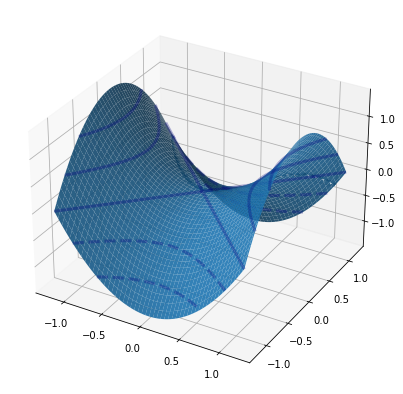

In [7]:
f = lambda x,y : x**2 - y**2
X = 1.2*np.linspace(-1,1,100)
Y = X.copy()
sep = lambda x : x**2
vue3d(f, X, Y, [-1,-0.5,0,0.5,1], sep)

***
## 1.2 Se repérer

### 1.2.1 Normes et distances

_Définition_ : Un $\mathbb{K}$-espace vectoriel $E$ est dit normé s’il existe une application, dite norme sur $E$, 

$N$ :
$E \rightarrow \mathbb{R}$
telle que
1. $\forall x \in E, N(x)=0 \Longleftrightarrow x=0_E$
2. $\forall \lambda \in \mathbb{K}, \forall x \in E, N(\lambda x) = |\lambda| N(x)$
3. $\forall (x,y) \in E^2 , N(x+y) \le N(x) + N(y)$


***
__Exercice__ : Vérifier que la valeur absolue est une norme dans $\mathbb{R}$, que les trois normes usuelles sont des
normes dans $\mathbb{R}^2$.

__La valeur absolue est une norme de $\mathbb{R}$__

1) Soit $x \in \mathbb{R}$ :

\begin{align*}
    |x| = 0 & \Longleftrightarrow x=0 \text{ ou } -x=0\\
    & \Longleftrightarrow x=0
\end{align*}

2) Soit $\lambda \in \mathbb{R}$, Soit $x \in \mathbb{R}$

\begin{align*}
    |\lambda x| &= 
    \begin{cases}
        \phantom{-} \lambda x & \text{si } \lambda x \ge 0 \\
        - \lambda x & \text{si } \lambda x \le 0
    \end{cases} \\
    &=
    \begin{cases}
        \phantom{-} \lambda x & \text{si } \lambda \ge 0 \text{ et } x \ge 0 \\
        \phantom{-} \lambda x & \text{si } \lambda \le 0 \text{ et } x \le 0 \\
        - \lambda x & \text{si } \lambda \le 0 \text{ et } x \ge 0 \\
        - \lambda x & \text{si } \lambda \ge 0 \text{ et } x \le 0
    \end{cases} \\
    &=
    \begin{cases}
        \phantom{-} \lambda |x| & \text{si } \lambda \ge 0 \\
        - \lambda |x| & \text{si } \lambda \le 0
    \end{cases} \\
    &= |\lambda| |x|
\end{align*}

3) Soit $(x,y) \in \mathbb{R}^2$:<br>
_On peut supposer sans perte de généralité que $|x| \ge |y|$_ <br>
alors :
\begin{align*}
    |x+y| &=
    \begin{cases}
        \phantom{-} a = \phantom{-} x + y & \text{si } x \ge 0 \text{ et } y \ge 0 \\
        \phantom{-} b = \phantom{-} x + y & \text{si } x \ge 0 \text{ et } y \le 0 \\
        -a = -x - y & \text{alors } x \le 0 \text{ et } y \le 0 \\
        -b = -x - y & \text{alors } x \le 0 \text{ et } y \ge 0
    \end{cases}
\end{align*}
On a alors $a \ge b \ge 0 \ge -b \ge -a$ <br>
or dans tous les cas, $|x|+|y| = a$. <br>
On a alors l'inégalité $|x|+|y| \ge |x+y|$

Finalement, la valeur absolue est donc bien une norme de $\mathbb{R}$

***
__On va seulement montrer que la norme 1 est une norme de $\mathbb{R}^2$__

Pour démontrer que la norme 1 (ici notée $N_1$) est une norme on utilisera les résultats sur le fait que la valeur absolue est une norme sur $\mathbb{R}$

1) Soit $x \in \mathbb{R}^2$ : <br>
Posons $x = a+b$ la décomposition de $x$ dans la base canonique $\{e_1, e_2\}$.

\begin{align*}
    N_1 (x) = 0 & \Longleftrightarrow |a| + |b| = 0\\
    & \Longleftrightarrow a = 0 \text{ et } b = 0\\
    & \Longleftrightarrow x = 0
\end{align*}

2) Soit $\lambda \in \mathbb{R}$, Soit $x \in \mathbb{R}^2$

\begin{align*}
    N_1 (\lambda x) &= |\lambda a| + |\lambda b|\\
    &= |\lambda||a| + |\lambda||b|\\
    &= |\lambda|(|a| + |b|)\\
    &= |\lambda| N_1 (x)
\end{align*}

3) Soient $x \in \mathbb{R}^2$ et $y \in \mathbb{R}^2$ :<br>
Posons $y = b+c$  la décomposition de $y$ dans la base canonique.<br>
Alors $x+y = (a+c)\phantom{.}e_1 + (b+d)\phantom{.}e_2$

\begin{align*}
    N_1 (x+y) &= |a+c| + |b+d| \\
    & \le |a| + |c| + |b| + |d| \\
    & \le |a| + |b| + |c| + |d| \\
    & \le \phantom{00} N_1(x) + N_1(y)
\end{align*}

Finalement, la distance de Manhattan est donc bien une norme de $\mathbb{R}$

***
## Exercices

__exercice 1__ : Caractériser et représenter les ensembles de définition des fonctions suivantes

$f_1 : (x,y) \mapsto ln(3x+y-2)$

\begin{align*}
    ln(3x+y-2) \text{ existe} &\Longleftrightarrow 3x+y-2 \gt 0 \\
    &\Longleftrightarrow -3x+2 \gt y
\end{align*}

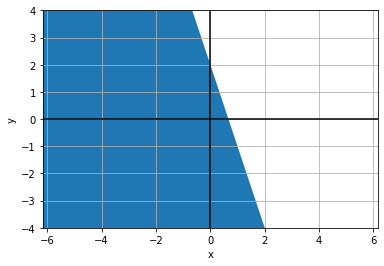

In [8]:
X = np.linspace(-10,10,1000)

plt.plot(X, X*0, 'k')
plt.plot(X*0, X, 'k')

plt.fill_between(X, -3*X+2, np.full(X.shape, min(-3*X+2)))

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid()

***
$f_2 : (x,y) \mapsto \sqrt{1+3xy}$

\begin{align*}
    \sqrt{1+3xy} \text{ existe} &\Longleftrightarrow 1+3xy \ge 0 \\
    &\Longleftrightarrow 3xy \ge -1 \\
    &\Longleftrightarrow y \ge -{1 \over 3x}
\end{align*}

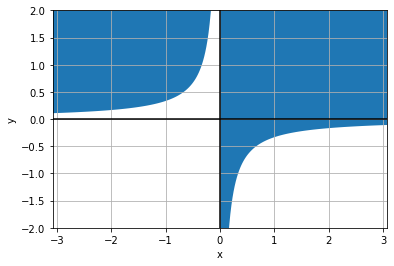

In [9]:
X = np.linspace(-10,10,1000)

plt.plot(X, X*0, 'k')
plt.plot(X*0, X, 'k')

plt.fill_between(X, -1/(3*X), np.full(X.shape, max(-1/(3*X))))

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()

***
$f_2 : (x,y) \mapsto {ln(x+y) \over 1-x }$

\begin{align*}
    {ln(x+y) \over 1-x } \text{ existe} &\Longleftrightarrow ln(x+y) \text{ existe et } 1-x \neq 0 \\
    & \Longleftrightarrow 
    \begin{cases}
        x+y > 0 \\
        1-x \neq 0
    \end{cases}\\
    & \Longleftrightarrow 
    \begin{cases}
        y > -x \\
        1 \neq x
    \end{cases}
\end{align*}

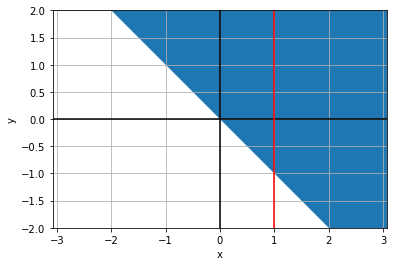

In [10]:
X = np.linspace(-10,10,1000)

plt.plot(X, X*0, 'k')
plt.plot(X*0, X, 'k')

plt.fill_between(X, -X, np.full(X.shape, max(-X)))
plt.plot([1,1],[-10,10], c='r')

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()

***
$f_2 : (x,y) \mapsto \sqrt{4-x^2-y^2}+{1 \over \sqrt{x^2 + y^2-1}}$

\begin{align*}
    \sqrt{4-x^2-y^2}+{1 \over \sqrt{x^2 + y^2-1}} \text{ existe} &\Longleftrightarrow \sqrt{4-x^2-y^2} \text{ existe  et } {1 \over \sqrt{x^2 + y^2-1}} \text{ existe} \\
    & \Longleftrightarrow 
    \begin{cases}
        4-x^2-y^2 > 0 \\
        \sqrt{x^2 + y^2-1} \neq 0
    \end{cases}\\
    & \Longleftrightarrow 
    \begin{cases}
        4-x^2-y^2 > 0 \\
        x^2 + y^2-1 > 0
    \end{cases}\\
    & \Longleftrightarrow 
    \begin{cases}
        x^2+y^2 > 4 \\
        x^2 + y^2 > 1
    \end{cases}\\
    & \Longrightarrow x^2+y^2 > 4 \\
    & \Longrightarrow y^2 > 4 - x^2 \\
    & \Longrightarrow |y| > \sqrt{4 - x^2}\\
    & \Longrightarrow 4 - x^2 > 0 \\
    & \Longrightarrow x \in \text{[$-2, 2$]} \\
\end{align*}

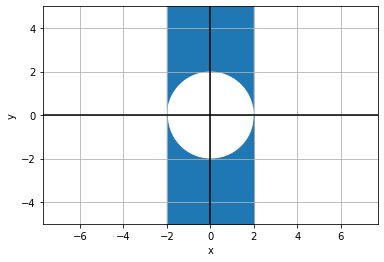

In [11]:
X = np.linspace(-2,2,1000)

plt.plot([-10,10], [0,0], 'k')
plt.plot([0,0], [-10,10], 'k')

plt.fill_between(X, (4-X**2)**0.5, np.full(X.shape, 5))
plt.fill_between(X, -(4-X**2)**0.5, np.full(X.shape, -5), color='C00')

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

***
__Exercice 2__ : Représenter les lignes de niveau des fonction suivantes

$f_1 : (x,y) \mapsto y^2$ pour les niveaux $k = -1,1,2$

\begin{align*}
    f_1(x,y) = k &\Longleftrightarrow y^2 = k \\
    &\Longleftrightarrow y = \pm \sqrt{k}
\end{align*}

pour $k=-1$, $y = \pm i$ si on autorise les réponses complexes. Sinon, $y$ n'est pas défini.<br>
pour $k=1$, $y = \pm 1$<br>
pour $k=2$, $y = \pm \sqrt{2}$

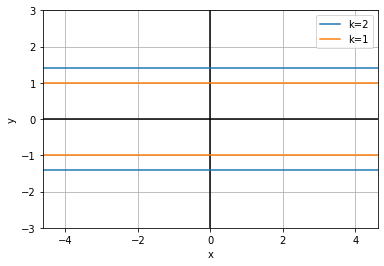

In [12]:
plt.plot([-10,10], [0,0], 'k')
plt.plot([0,0], [-10,10], 'k')

s2 = np.sqrt(2)
plt.plot([-10,10],[-s2,-s2], c='C00', label="k=2")
plt.plot([-10,10],[-1,-1], c='C01', label="k=1")
plt.plot([-10,10],[1,1], c='C01')
plt.plot([-10,10],[s2,s2], c='C00')
plt.legend()

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

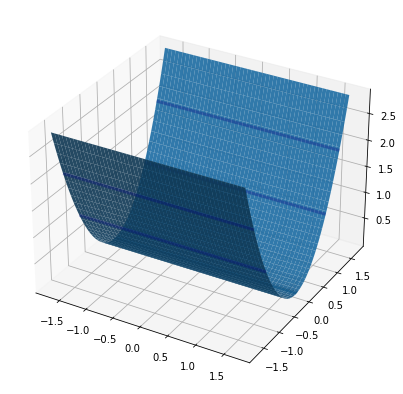

In [13]:
f1 = lambda x,y : y**2
X = 1.7*np.linspace(-1,1,1000)
Y = X.copy()
sep = lambda x : 0
vue3d(f1, X, Y, [1,2], sep)

***
$f_2 : (x,y) \mapsto {{x^4 + y^4} \over {8-x^2 y^2}}$ pour $k=2$

\begin{align*}
    f_2(x,y) = 2 &\Longleftrightarrow {{x^4 + y^4} \over {8-x^2 y^2}} = 2 \\
    &\Longleftrightarrow {{(x^2)^2 + (y^2)^2} \over {8-x^2 y^2}} = 2
\end{align*}

Alors, $f_2$ est symétrique par rapport à l'axe des abscisses et des ordonnées car toutes les composantes en x et en y sont des fonctions paires.<br>
On ne va donc s'intéresser qu'au cas où $x \ge 0$ et $y \ge 0$.<br>
De plus :
\begin{align*}
    {{x^4 + y^4} \over {8-x^2 y^2}} \text{ existe } &\Longrightarrow  8-x^2 y^2 \neq 0 \\
    &\Longrightarrow  x^2 y^2 \neq 8 \\
    &\Longrightarrow  (xy)^2 \neq 8 \\
    &\Longrightarrow  xy \neq \pm \sqrt{8} \\
    &\Longrightarrow  xy \neq \pm 2\sqrt{2}
\end{align*}

Pour en revenir au calcul des courbes de niveau :

\begin{align*}
    f_2(x,y) = 2 &\Longleftrightarrow {{x^4 + y^4} \over {8-x^2 y^2}} = 2 \\
    &\Longleftrightarrow x^4 + y^4 = 2 (8-x^2 y^2)\\
    &\Longleftrightarrow x^4 + y^4 = 16-2x^2 y^2\\
    &\Longleftrightarrow x^4 + 2x^2 y^2 + y^4 = 16\\
    &\Longleftrightarrow (x^2 + y^2)^2 = (\pm 4)^2\\
    &\Longleftrightarrow |x^2 + y^2| = \pm 4\\
    &\Longleftrightarrow x^2 + y^2 = 4 \phantom{-}(*)\\ 
    &\Longleftrightarrow y^2 = 4 - x^2\\
    &\Longleftrightarrow y = \sqrt{4 - x^2} \phantom{-}(**)
\end{align*}

$(*)$ $x^2 + y^2 \ge 0$ donc on ne conserve que la solution positive.<br>
$(**)$ On ne considère que la solution positive car on a supposé $y$ positif.

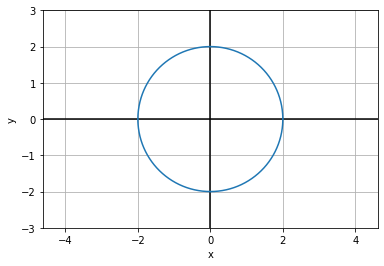

In [14]:
X = np.linspace(0,2,1000)

plt.plot([-10,10], [0,0], 'k')
plt.plot([0,0], [-10,10], 'k')

A = (4-X**2)**0.5
plt.plot(X, A, c='C00')
plt.plot(X, -A, c='C00')
plt.plot(-X, A, c='C00')
plt.plot(-X, -A, c='C00')

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

(0.0, 3.0)

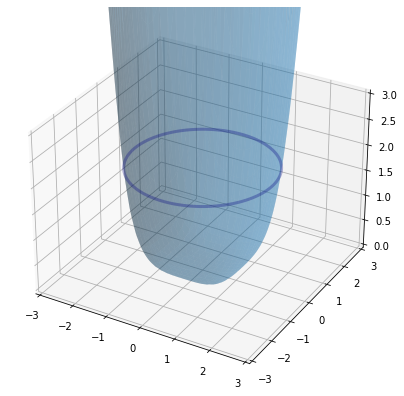

In [15]:
f2 = lambda x,y : (x**4 + y**4) /  (8-x**2 * y**2)
X = np.linspace(-4,4,1000)
Y = np.linspace(-4,4,1000)
sep = lambda x : x+3.5
L =[2]
#création de la figure en 3d
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

#création des variables d'espaces pour afficher le graphe
XX,YY = np.meshgrid(X,Y)
ZZ = f2(XX,YY)
ZZ[ZZ>10]=np.nan
ZZ[ZZ<0]=np.nan

#séparation des affichages en deux morceaux pour éviter d'avoir des points de l'arrière plan devant des points du premier plan
M1 = sep(XX)>YY #masque du derrière
M2 = sep(XX)<YY-0.09 #masque du devant

XX1,XX2 = XX.copy(), XX.copy()
YY1,YY2 = YY.copy(), YY.copy()
ZZ1,ZZ2 = ZZ.copy(), ZZ.copy()

for T in [XX1,YY1,ZZ1] :
    T[M1]=np.nan
for T in [XX2,YY2,ZZ2] :
    T[M2]=np.nan

#ajout de l'arrière plan
ax.plot_surface(XX1,YY1,ZZ1, color='C00', alpha=0.3)
ax.contour(XX1,YY1, ZZ1, levels=L, colors=['navy'], alpha=0.3, linewidths=[3])

#ajout du premier plan
ax.plot_surface(XX2,YY2,ZZ2, color='C00', alpha=0.3)
ax.contour(XX2,YY2, ZZ2, levels=L, colors=['navy'], alpha=0.3, linewidths=[3])

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(0,3)

***
__Exercice 3__ : Représenter des lignes de niveau représentatives des fonctions suivantes

$f_1 : (x,y) \mapsto x+y$

\begin{align*}
    f_1 (x,y) = c &\Longleftrightarrow x + y = c \\
    &\Longleftrightarrow y = -x + c
\end{align*}

cela veut dire que la ligne de niveau associée au niveau $c \in \mathbb{R}$ est la droite de la fonction $x \mapsto -x + c$

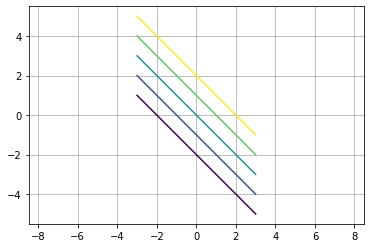

In [28]:
x = np.linspace(-3,3,100)
y = x.copy()
l = lambda c : (lambda x  : -x+c)
colors = plt.cm.viridis(np.linspace(0,1,5))
plt.axis('equal')
plt.grid()
for i in range(-2,3):
    plt.plot(x, l(i)(x), c = colors[i+2])

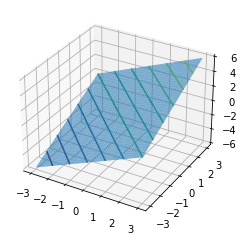

In [32]:
X,Y = np.meshgrid(x,y)
Z = X + Y
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X,Y,Z, alpha=0.6)
ax.contour(X,Y,Z, np.linspace(-6,6,13))

***
$f_2 (x,y) \mapsto e^{y-x^2}$

\begin{align*}
    f_2 (x,y) = c &\Longleftrightarrow e^{y-x^2} = c \\
    &\Longleftrightarrow e^y = c e^{x^2} \\
    &\Longleftrightarrow y = ln (c e^{x^2}) \\
    &\Longleftrightarrow y = ln (e^{ln(c)} e^{x^2}) \\
    &\Longleftrightarrow y = ln(c) + x^2)
\end{align*}

Donc la ligne de niveau associée à la valeur $c \in \mathbb{R}^*_+$ est la courbe de la fonction $x \mapsto x^2 + ln(c)$

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

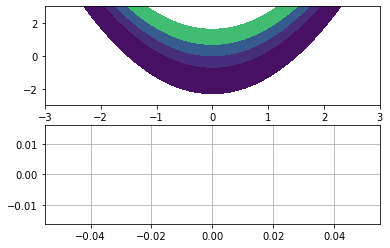

In [108]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(2,1)

x = np.linspace(-3,3,100)
y = x.copy()
X,Y = np.meshgrid(x,y)
V = [0.1,0.5,1,2,5]
plt.axis('equal')
plt.grid()

l = ax[0].contourf(X,Y,np.exp(Y-X**2),V)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(l, cax=cax, orientation='vertical')

ax[0].remove()
ax[1].contour(X,Y,np.exp(Y-X**2),V)

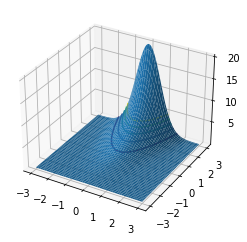

In [49]:
X,Y = np.meshgrid(x,y)
Z = np.exp(Y-X**2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X,Y,Z)
ax.contour(X,Y,Z, np.linspace(1,5,5))